## Assignment 2 

Authors: Catherine Slaughter and Paloma Jol of Group 23  
Assignment 2 of the course introduction to machine learning (IML)  
Due: 23 december 2022 23:59


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import astropy
import astropy.units as u
import astropy.coordinates as coord

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn import tree
from sklearn import ensemble

2022-12-21 15:19:05.073704: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Start pre-processing data, and exploring data analysis

In [4]:
def read_in_data(filename = 'data/A2_data.csv'):
    '''Reads in the data from the given csv, and saves it in a Pandas dataframe'''
    df = pd.read_csv(filename)
    
    return df

def histogram(column):
    '''Plot the histograms of the features'''
    plt.hist(X[column],facecolor='blue', alpha=0.8,histtype='bar', ec='black')
    plt.title(column)
    plt.xlabel('Feature label')
    plt.ylabel('Number of samples')
    plt.show()


There are 100000 samples of each 11 features


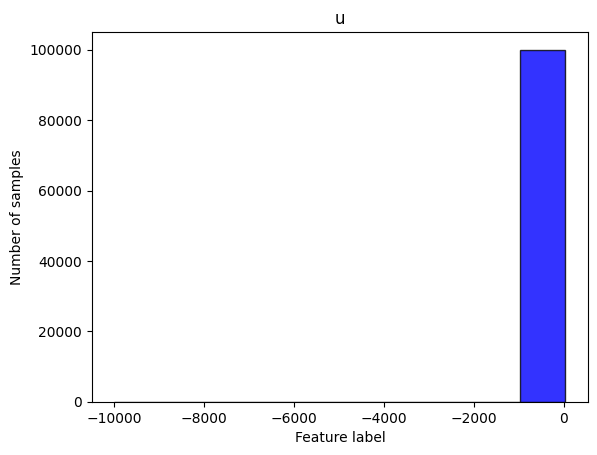

            alpha     delta       u       g        r         i       z  \
79543  224.006526 -0.624304 -9999.0 -9999.0  18.1656  18.01675 -9999.0   

       field_ID    MJD  redshift  plate class  
79543       537  58146     1.828   7834  STAR  
There are final 99999 samples of now 8 features
There are 66999 training samples of each 8 features


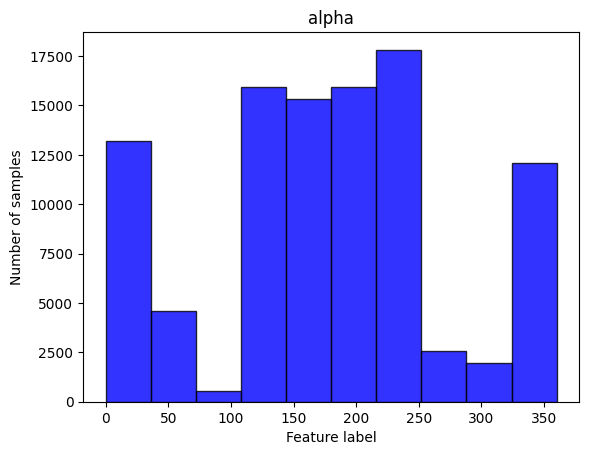

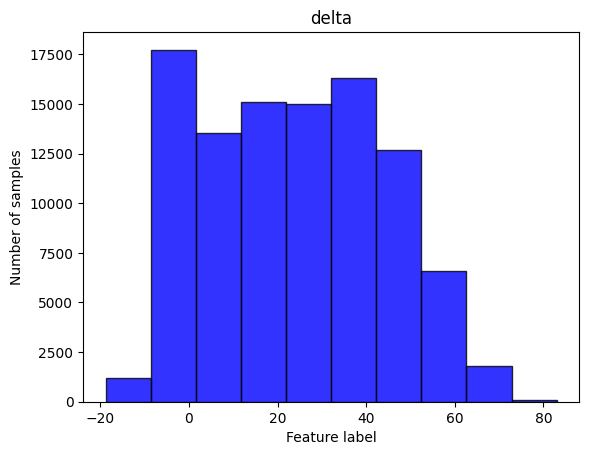

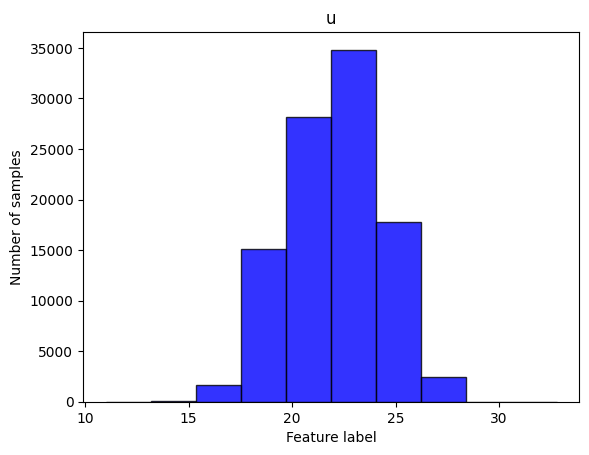

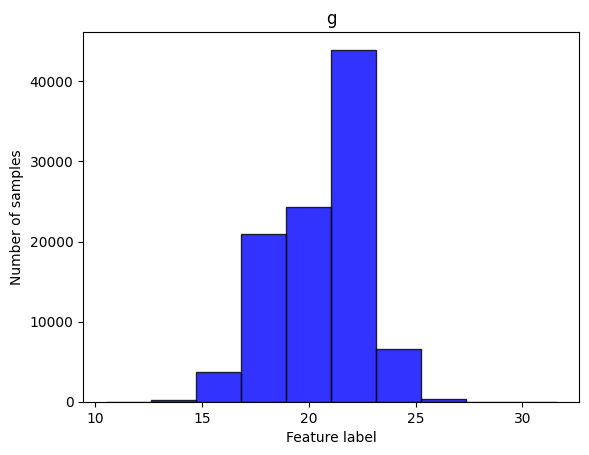

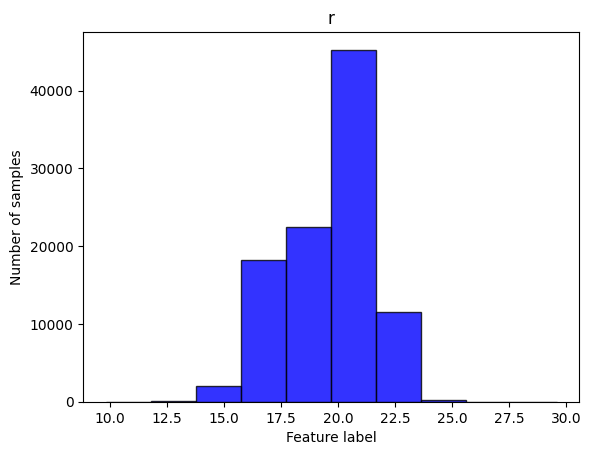

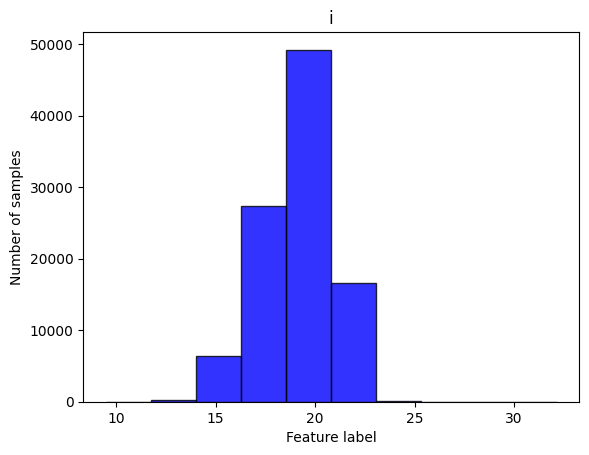

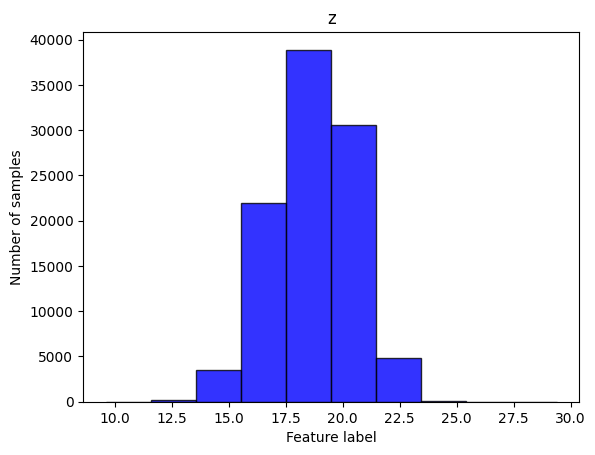

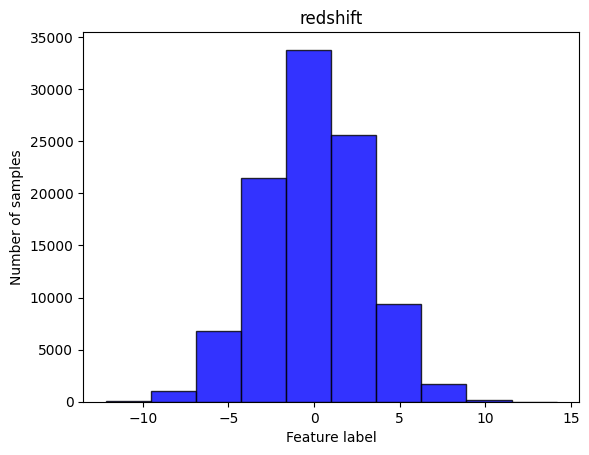

In [5]:
path = "data/"

data=read_in_data(path+'A2_data.csv')
X,y= data.loc[:, data.columns != 'class'], data['class']

print(f'There are {X.shape[0]} samples of each {X.shape[1]} features')

#Data includes some identifiers lets remove those 
ID_parameters= ['field_ID','MJD','plate']#,'alpha', 'delta']
for ID in ID_parameters:
    X=X.loc[:, X.columns != ID]

histogram('u')

#We know that a flux should be positive so remove the datapoint which does not have that
#This datapoint has value -9999 so not a detection but a instrumentation issue
I_remove=np.where(X['u']<0)[0]
print(data.loc[I_remove])
X,y = X.drop(I_remove),y.drop(I_remove)
X,y=X.reset_index(drop=True),y.reset_index(drop=True)
data_processed= X.join(y)
data_processed.to_csv(path+'A2_data_preprocessed.csv', index=False)


print(f'There are final {X.shape[0]} samples of now {X.shape[1]} features')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
X_train,y_train=X_train.reset_index(drop=True),y_train.reset_index(drop=True)
X_test,y_test=X_test.reset_index(drop=True),y_test.reset_index(drop=True)


print(f'There are {X_train.shape[0]} training samples of each {X_train.shape[1]} features')

for C in X.columns:
    histogram(C)

Start dimensionality reductions

In [26]:
#Visualise the dimension models
def visualise_components(model_name, y, finaldim):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Component 1', fontsize = 15)
    ax.set_ylabel('Component 2', fontsize = 15)
    ax.set_title(f'2 component {model_name}', fontsize = 20)
    targets = np.unique(y)
    colors = ['r', 'g', 'b','k','y']
    for target, color in zip(targets,colors):
        indicesToKeep = finaldim['class'] == target
        ax.scatter(finaldim.loc[indicesToKeep, 'component 1']
                , finaldim.loc[indicesToKeep, 'component 2']
                , c = color
                , s = 10
                , marker = '.'
                , alpha=0.2)
    ax.legend(targets, fontsize=15)
    ax.grid()
    #plt.savefig(f'plots/{model_name}.pdf')
    plt.show()

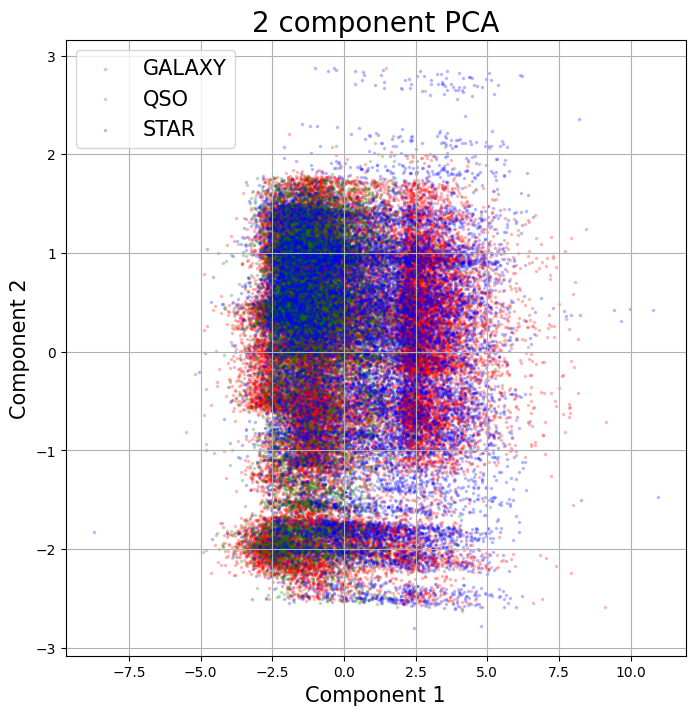

In [27]:
#PCA
x = X_train
x = StandardScaler().fit_transform(x)


# Use PCA to reduce to two dimensions
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principal = pd.DataFrame(data = principalComponents,columns = ['component 1', 'component 2','component 3', 'component 4','component 5'])
finalPca = pd.concat([principal, y_train], axis = 1)

visualise_components('PCA', y_train, finalPca)

finalPca
finalPca.to_csv('PCA_reduced_5_alphadelta.csv', index=False)

10


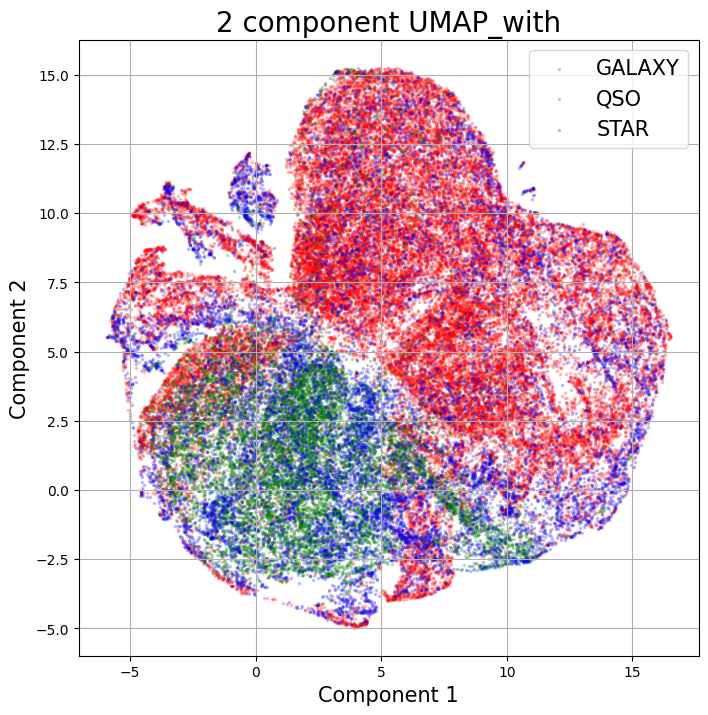

10


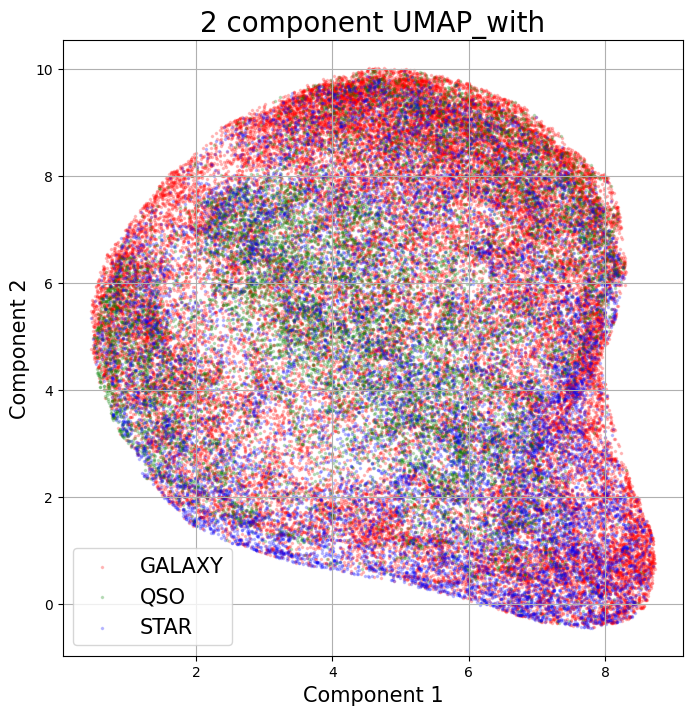

In [28]:
#UMAP
#best parameters from experiments
params_list=[{
    "n_components": 2,
    "n_neighbors": 10,
    "min_dist": 0.3,
    "metric": "correlation", 
    "init": "random"
},{
    "n_components": 5,
    "n_neighbors": 10,
    "min_dist": 0.3,
    "metric": "correlation", 
    "init": "random"
}]
for params in params_list:
    print(params['n_neighbors'])
    x = X_train
    x = StandardScaler().fit_transform(x)
    c = params['n_components']
    reducer = umap.UMAP(**params)
    UmapComponents = reducer.fit_transform(x)
    UmapDf = pd.DataFrame(data = UmapComponents,columns = np.array([f'component {i}' for i in range(1,c+1)],dtype=str))
    finalUmapDf = pd.concat([UmapDf, y_train], axis = 1)
    visualise_components(f"UMAP", y_train, finalUmapDf)
    finalUmapDf.to_csv(f'Umap_reduced_data_with_{c}.csv', index=False)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 66999 samples in 0.070s...
[t-SNE] Computed neighbors for 66999 samples in 1.641s...
[t-SNE] Computed conditional probabilities for sample 1000 / 66999
[t-SNE] Computed conditional probabilities for sample 2000 / 66999
[t-SNE] Computed conditional probabilities for sample 3000 / 66999
[t-SNE] Computed conditional probabilities for sample 4000 / 66999
[t-SNE] Computed conditional probabilities for sample 5000 / 66999
[t-SNE] Computed conditional probabilities for sample 6000 / 66999
[t-SNE] Computed conditional probabilities for sample 7000 / 66999
[t-SNE] Computed conditional probabilities for sample 8000 / 66999
[t-SNE] Computed conditional probabilities for sample 9000 / 66999
[t-SNE] Computed conditional probabilities for sample 10000 / 66999
[t-SNE] Computed conditional probabilities for sample 11000 / 66999
[t-SNE] Computed conditional probabilities for sample 12000 / 66999
[t-SNE] Computed conditional probabilities for sam

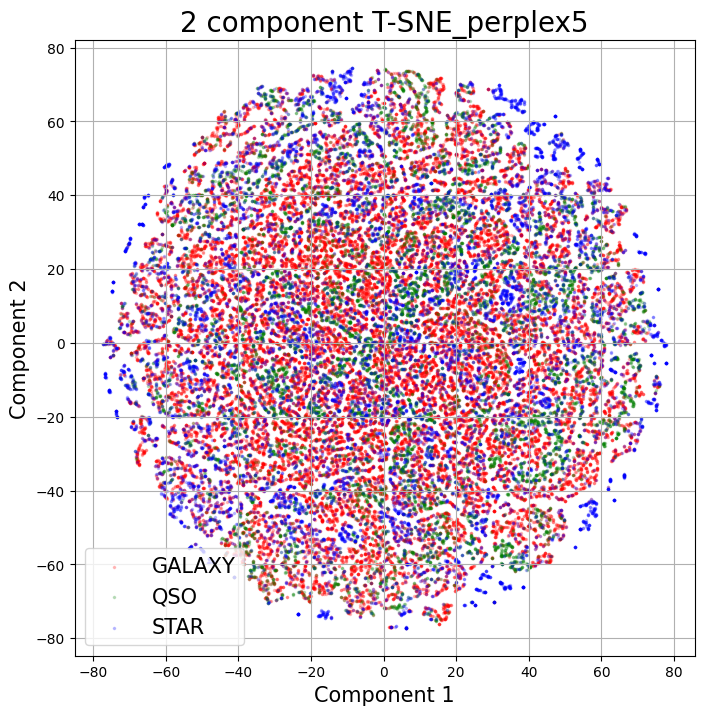

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 66999 samples in 0.076s...
[t-SNE] Computed neighbors for 66999 samples in 5.931s...
[t-SNE] Computed conditional probabilities for sample 1000 / 66999
[t-SNE] Computed conditional probabilities for sample 2000 / 66999
[t-SNE] Computed conditional probabilities for sample 3000 / 66999
[t-SNE] Computed conditional probabilities for sample 4000 / 66999
[t-SNE] Computed conditional probabilities for sample 5000 / 66999
[t-SNE] Computed conditional probabilities for sample 6000 / 66999
[t-SNE] Computed conditional probabilities for sample 7000 / 66999
[t-SNE] Computed conditional probabilities for sample 8000 / 66999
[t-SNE] Computed conditional probabilities for sample 9000 / 66999
[t-SNE] Computed conditional probabilities for sample 10000 / 66999
[t-SNE] Computed conditional probabilities for sample 11000 / 66999
[t-SNE] Computed conditional probabilities for sample 12000 / 66999
[t-SNE] Computed conditional probabilities for sam

In [29]:
params_list=[{
    'perplexity' : 5 ,
    'early_exaggeration' : 12.0 ,
    'metric': 'euclidean'
},{
    'perplexity' : 30 ,
    'early_exaggeration' : 12.0 ,
    'metric': 'euclidean'
},{
    'perplexity' : 50 ,
    'early_exaggeration' : 12.0 ,
    'metric': 'euclidean'
}]

# Use T-SNE to reduce to two dimensions
for params in params_list:
    x = X_train
    tsne = TSNE(n_components=2, verbose=1, perplexity=params['perplexity'], early_exaggeration=params['early_exaggeration'], metric=params['metric'])
    tsneComponents = tsne.fit_transform(x)
    tsneDf = pd.DataFrame(data = tsneComponents,columns = ['component 1', 'component 2'])
    finalTsneDf = pd.concat([tsneDf, y_train], axis = 1)
    finalTsneDf

    visualise_components(f"T-SNE_perplex{params['perplexity']}", y_train, finalTsneDf)

Start clustering

In [ ]:
class Cluster_object():
    def __init__(self,method):
        self.method= method 

    def cluster_fit(self,X,params):
        clustering = self.method(**params)
        clustering.fit(X)
        return clustering

    def score(self,y_pred, y):
        nmis=0 #number misclassified
        for i in range(len(y_pred)):
            if y_pred[i] != y[i]:
                nmis+=1
        accuracy=nmis/len(y)
        print(f'Out of {len(y)} there are {nmis} missclassified samples, thus an accuracy of {accuracy}')
        return accuracy